## Import packages

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

"""
This code is used for Fig2.E. Radar chart of average county-level facility-based accessibility by charger type across five trip purposes.
Data: Chenged Population-based accessibility from 2014 to 2024.
"""


'\nThis code is used for Fig2.E. Radar chart of average county-level facility-based accessibility by charger type across five trip purposes.\nData: Chenged Population-based accessibility from 2014 to 2024.\n'

## Data Processing

In [2]:
def read_evse_excel_data(filename="Facility_based_accessibility_radar.csv"):
    """
    Read EVSE data from Excel file with multiple sheets.
    """
    # Read all sheets from Excel file
    accessibility_data = pd.read_csv(filename)
    variables = [
        'school_value_all', 'medical_value_all', 'shopping_value_all', 'social_value_all', 'meals_value_all',
        'school_value_dc', 'medical_value_dc', 'shopping_value_dc', 'social_value_dc', 'meals_value_dc',
        'school_value_ac', 'medical_value_ac', 'shopping_value_ac', 'social_value_ac', 'meals_value_ac'
    ]

    for var in variables:
        globals()[var] = accessibility_data[var].iloc[0]
        
        return accessibility_data

## Mapping and Visualization

In [3]:
def create_radar_chart(meals_value_all, shopping_value_all, medical_value_all, social_value_all, school_value_all,
                      meals_value_dc, shopping_value_dc, medical_value_dc, social_value_dc, school_value_dc,
                      meals_value_ac, shopping_value_ac, medical_value_ac, social_value_ac, school_value_ac,
                      figsize=(7, 5)):
    """
    Create a radar chart comparing accessibility values for different POI categories and EVSE types.
    """
    
    # Data preparation
    categories = ['Meals', 'Shopping/Errands', 'Medical/Dental services', 
                 'Social/Recreational', 'School/Daycare/Religious']
    
    # Prepare data arrays
    point_values_all = [meals_value_all, shopping_value_all, medical_value_all, social_value_all, school_value_all]
    point_values_dc = [meals_value_dc, shopping_value_dc, medical_value_dc, social_value_dc, school_value_dc]
    point_values_ac = [meals_value_ac, shopping_value_ac, medical_value_ac, social_value_ac, school_value_ac]
    
    # Convert to polar coordinates
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Close the polygon
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
    
    # Color settings
    background_colors = ['#EAB080', '#DE582B', '#F3A332', '#8FDBF3', '#018A67']
    
    # Add background colors for each sector
    width = 2 * np.pi / len(categories)
    max_radius = max(max(point_values_all), max(point_values_dc), max(point_values_ac)) + 500
    
    for i, angle in enumerate(angles[:-1]):
        ax.bar(angle, 
               max_radius,
               width=width, 
               color=background_colors[i], 
               alpha=0.2,
               edgecolor=None,
               linewidth=0,
               zorder=0)
    
    # Close polygon data
    point_values_all += point_values_all[:1]
    point_values_dc += point_values_dc[:1]
    point_values_ac += point_values_ac[:1]
    
    # Plot radar chart lines
    ax.plot(angles, point_values_all, color='brown', linewidth=2, linestyle='-', marker='o',
            markersize=8, markerfacecolor='brown', markeredgecolor='black', label='All EVSE')
    
    ax.plot(angles, point_values_dc, color='teal', linewidth=2, linestyle='-', marker='o',
            markersize=8, markerfacecolor='teal', markeredgecolor='black', label='DC EVSE')
    
    ax.plot(angles, point_values_ac, color='#84BA42', linewidth=2, linestyle='-', marker='o',
            markersize=8, markerfacecolor='#84BA42', markeredgecolor='black', label='AC EVSE')
    
    # Helper function for detailed arcs
    def plot_radial_arc(rad_start, rad_end, radius_value, arc_color):
        """Plot radial arcs for detailed visualization"""
        if radius_value > 0:
            theta_start = np.deg2rad(rad_start)
            theta_end = np.deg2rad(rad_end)
            theta = np.linspace(theta_start, theta_end, 100)
            ax.plot(theta, [radius_value] * len(theta), color=arc_color, linewidth=1, linestyle='--')
    
    # Plot radial arcs for All EVSE
    plot_radial_arc(-8, 8, meals_value_all, 'brown')
    plot_radial_arc(64, 80, shopping_value_all, 'brown')
    plot_radial_arc(136, 152, medical_value_all, 'brown')
    plot_radial_arc(208, 224, social_value_all, 'brown')
    plot_radial_arc(280, 296, school_value_all, 'brown')
    
    # Plot radial arcs for DC EVSE
    plot_radial_arc(-8, 8, meals_value_dc, 'teal')
    plot_radial_arc(64, 80, shopping_value_dc, 'teal')
    plot_radial_arc(136, 152, medical_value_dc, 'teal')
    plot_radial_arc(208, 224, social_value_dc, 'teal')
    plot_radial_arc(280, 296, school_value_dc, 'teal')
    
    # Plot radial arcs for AC EVSE
    plot_radial_arc(-8, 8, meals_value_ac, '#84BA42')
    plot_radial_arc(64, 80, shopping_value_ac, '#84BA42')
    plot_radial_arc(136, 152, medical_value_ac, '#84BA42')
    plot_radial_arc(208, 224, social_value_ac, '#84BA42')
    plot_radial_arc(280, 296, school_value_ac, '#84BA42')
    
    # Configure polar plot
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels=[''] * len(categories))
    
    # Configure radial axis
    circle_radii = [1000, 5000, 9000]
    ax.set_rlim(0, max_radius)
    ax.set_rgrids(circle_radii, angle=210, labels=['1000', '5000', '9000'], color='gray')
    
    # Add legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.8)
    
    return fig, ax

## Test run

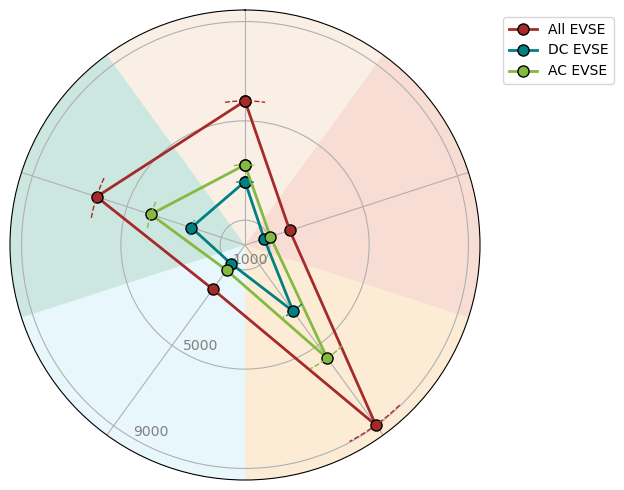

In [4]:
# Usage example:
if __name__ == "__main__":
    accessibility_data = pd.read_csv('Facility_based_accessibility_radar.csv')
    
    school_value_all = accessibility_data['school_value_all'].iloc[0]
    medical_value_all = accessibility_data['medical_value_all'].iloc[0]
    shopping_value_all = accessibility_data['shopping_value_all'].iloc[0]
    social_value_all = accessibility_data['social_value_all'].iloc[0]
    meals_value_all = accessibility_data['meals_value_all'].iloc[0]
    
    school_value_dc = accessibility_data['school_value_dc'].iloc[0]
    medical_value_dc = accessibility_data['medical_value_dc'].iloc[0]
    shopping_value_dc = accessibility_data['shopping_value_dc'].iloc[0]
    social_value_dc = accessibility_data['social_value_dc'].iloc[0]
    meals_value_dc = accessibility_data['meals_value_dc'].iloc[0]
    
    school_value_ac = accessibility_data['school_value_ac'].iloc[0]
    medical_value_ac = accessibility_data['medical_value_ac'].iloc[0]
    shopping_value_ac = accessibility_data['shopping_value_ac'].iloc[0]
    social_value_ac = accessibility_data['social_value_ac'].iloc[0]
    meals_value_ac = accessibility_data['meals_value_ac'].iloc[0]
    
    # Create radar chart
    fig, ax = create_radar_chart(
        meals_value_all, shopping_value_all, medical_value_all, social_value_all, school_value_all,
        meals_value_dc, shopping_value_dc, medical_value_dc, social_value_dc, school_value_dc,
        meals_value_ac, shopping_value_ac, medical_value_ac, social_value_ac, school_value_ac
    )
    
    plt.show()